In [1]:
include("jl/init_default.jl");

22-פבר 06:52:43:INFO:root:N=74293025 min(m)=46.538624 max(m)=959026.75
22-פבר 06:52:44:INFO:root:rescaling masses
22-פבר 06:52:44:INFO:root:N=74293025 min(m)=50.036606 max(m)=1.0311101e6


In [2]:
include("jl/all.jl")
pop_posv()

In [3]:
opos_i = SharedArray(Float32, size(pos));

In [4]:
copy_into!(opos_i, pos);

In [5]:
optimize_2lpt_vs_pushed_pos!(rho, opos_i, pos, m, 0.001, 1.0, 0.21, 200);

22-פבר 06:52:54:INFO:root:opt2lpt start a_from=0.001 a_to=1.0 end_meandx=200 fracmov=0.21
22-פבר 06:52:54:INFO:root:sim2lpt start from a=0.001 to a=1.0
22-פבר 06:53:15:INFO:root:sim2lpt 1st order dim 1
22-פבר 06:53:22:INFO:root:sim2lpt 1st order dim 2
22-פבר 06:53:29:INFO:root:sim2lpt 1st order dim 3
22-פבר 06:53:56:INFO:root:sim2lpt 2nd order dim 1
22-פבר 06:54:03:INFO:root:sim2lpt 2nd order dim 2
22-פבר 06:54:10:INFO:root:sim2lpt 2nd order dim 3
22-פבר 06:54:19:INFO:root:sim2lpt end
22-פבר 06:54:20:INFO:root:opt2lpt step=1 mdx=7206.927
22-פבר 06:54:24:INFO:root:sim2lpt start from a=0.001 to a=1.0
22-פבר 06:54:45:INFO:root:sim2lpt 1st order dim 1
22-פבר 06:54:52:INFO:root:sim2lpt 1st order dim 2
22-פבר 06:54:59:INFO:root:sim2lpt 1st order dim 3
22-פבר 06:55:25:INFO:root:sim2lpt 2nd order dim 1
22-פבר 06:55:33:INFO:root:sim2lpt 2nd order dim 2
22-פבר 06:55:40:INFO:root:sim2lpt 2nd order dim 3
22-פבר 06:55:50:INFO:root:sim2lpt end
22-פבר 06:55:50:INFO:root:opt2lpt step=2 mdx=3451.5342
2

In [6]:
mean_std_dx_vs_pushed_pos(opos_i)

(3107.6895f0,2399.8928f0)

In [7]:
kd = get_kd(pos);

In [8]:
to_rho!(opos_i,m, rho);
rho_to_1st_order_vel_pot!(rho);
get_1st_order_comoving_vel!(c, 1.0, 1, pos, rho);
_vx1 = real(c)
first_order_vel_pot_to_sencond_order!(rho);
get_2nd_order_comoving_vel!(c, 1.0, 1, pos, rho);

_vx2 = real(c);

In [18]:
get_slope_std_smoothed(kd, _vx1-0.5*_vx2, vx, pos, 10000.0, 100000)

(1.4606588979577833,84.791923216313)

In [17]:
to_rho!(opos_i,m, rho);

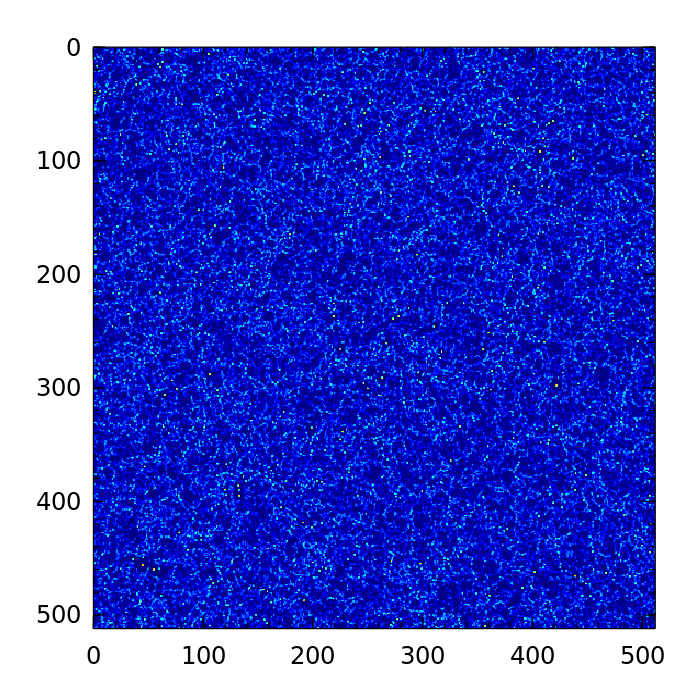

In [18]:
imrho = real(rho[:,:,254]) + real(rho[:,:,255]) + real(rho[:,:,256])
Winston.set_default_plot_size(700,700)
imagesc(log10(1e-8+imrho))

In [19]:
to_delta!(rho);

In [20]:
corr = get_correlation(rho);

In [21]:
pop_posv()
to_rho!(pos,m, rho);
to_delta!(rho)
corr_org = get_correlation(rho);

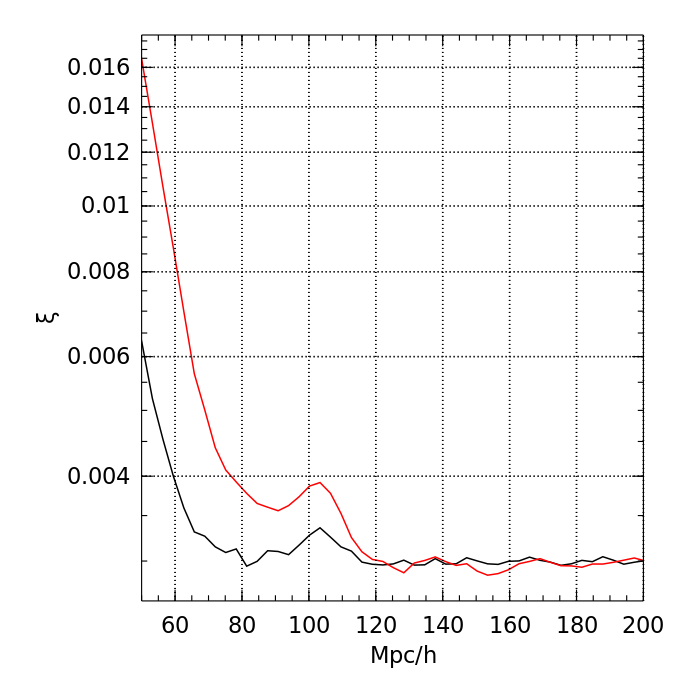

In [22]:
semilogy(xl/1000, corr*1.5)
hold(true)
semilogy(xl/1000, corr_org, "red")
hold(false)
xlim(50,200)
grid(true)
xlabel("Mpc/h")
ylabel("\\xi")